In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
warnings.filterwarnings('ignore')

# 1. Loading Data

In [14]:
url = '../../Data/d6/diabetes_012_health_indicators_BRFSS2021.csv'
url = glob.glob(url)[0]
df = pd.read_csv(url)
df = df.rename(columns={'Diabetes_012': 'Class'})
for i in df.columns:
    if i != 'BMI':
        df[i] = df[i].astype(int)
df.drop_duplicates(inplace=True)
df['Class'].value_counts()

Class
0    184542
2     33395
1      5613
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223550 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Class                 223550 non-null  int64  
 1   HighBP                223550 non-null  int64  
 2   HighChol              223550 non-null  int64  
 3   CholCheck             223550 non-null  int64  
 4   BMI                   223550 non-null  float64
 5   Smoker                223550 non-null  int64  
 6   Stroke                223550 non-null  int64  
 7   HeartDiseaseorAttack  223550 non-null  int64  
 8   PhysActivity          223550 non-null  int64  
 9   Fruits                223550 non-null  int64  
 10  Veggies               223550 non-null  int64  
 11  HvyAlcoholConsump     223550 non-null  int64  
 12  AnyHealthcare         223550 non-null  int64  
 13  NoDocbcCost           223550 non-null  int64  
 14  GenHlth               223550 non-null  int64  
 15  MentH

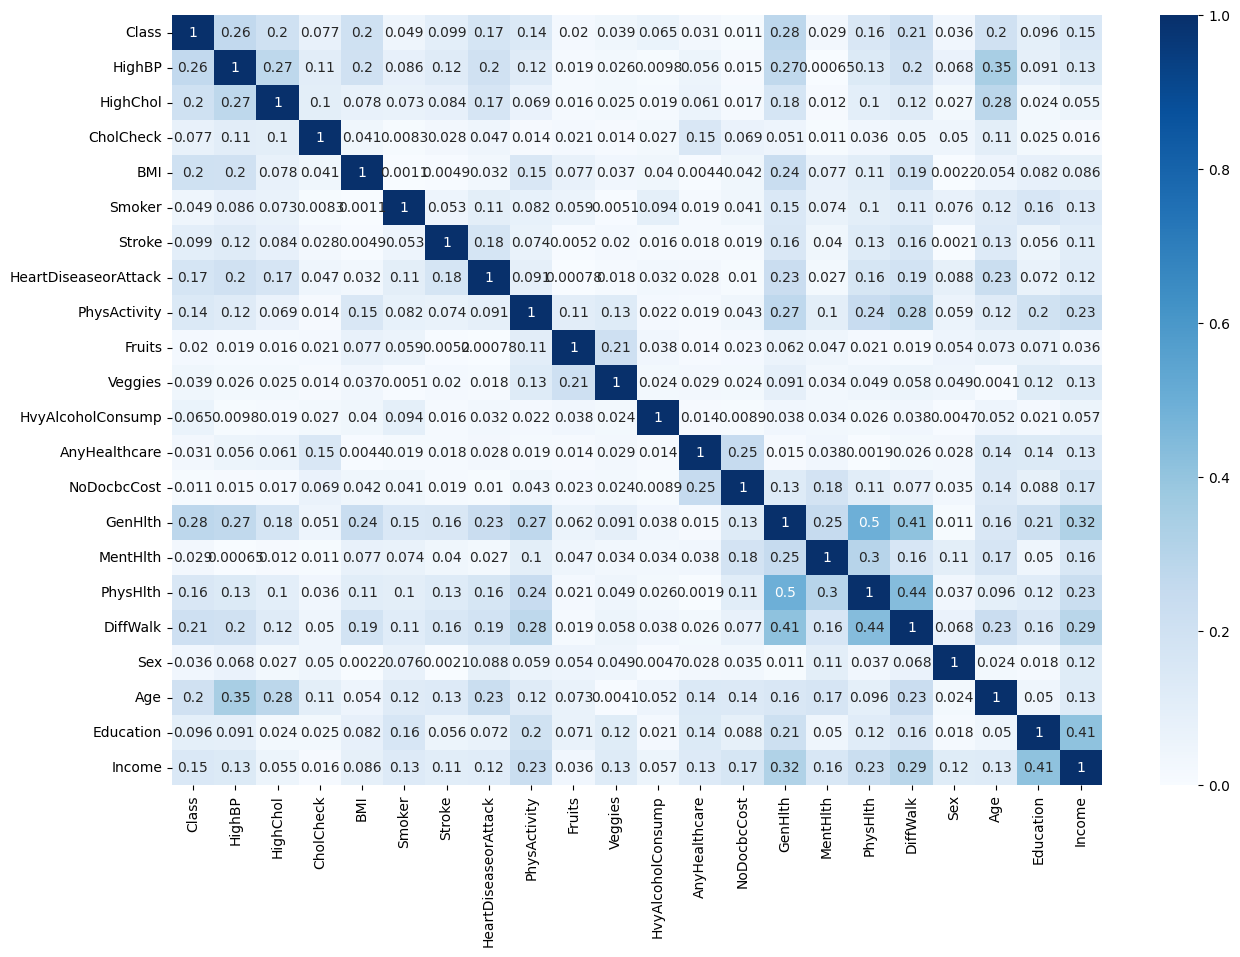

In [16]:
corr = np.abs(df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 3. Drop Outliers

In [17]:
from sklearn.neighbors import LocalOutlierFactor

In [18]:
model = LocalOutlierFactor(n_neighbors=2)
df['anomaly']= model.fit_predict(df)
df = df[df['anomaly'] == 1]
df.drop('anomaly', axis=1, inplace=True)
df

,Class,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,15.0,1,0,0,0,1,...,1,0,5,10,20,0,0,11,4,5
1,2,1,0,1,28.0,0,0,1,0,1,...,1,0,2,0,0,0,0,11,4,3
2,2,1,1,1,33.0,0,0,0,1,1,...,1,0,2,10,0,0,0,9,4,7
3,2,0,1,1,29.0,0,1,1,1,1,...,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24.0,1,0,0,0,0,...,1,0,3,0,0,1,1,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2,1,1,1,21.0,0,0,0,1,1,...,1,0,4,0,0,0,1,10,2,3
236374,0,1,0,1,25.0,1,0,0,1,1,...,0,1,2,20,0,0,0,3,4,5
236375,0,0,1,1,31.0,0,0,0,1,1,...,1,0,2,0,0,0,1,7,6,10
236376,0,1,0,1,24.0,0,0,0,1,1,...,1,0,2,0,0,0,1,10,4,6


In [19]:
df['Class'].value_counts().sort_index()

Class
0    181208
1      5368
2     32975
Name: count, dtype: int64

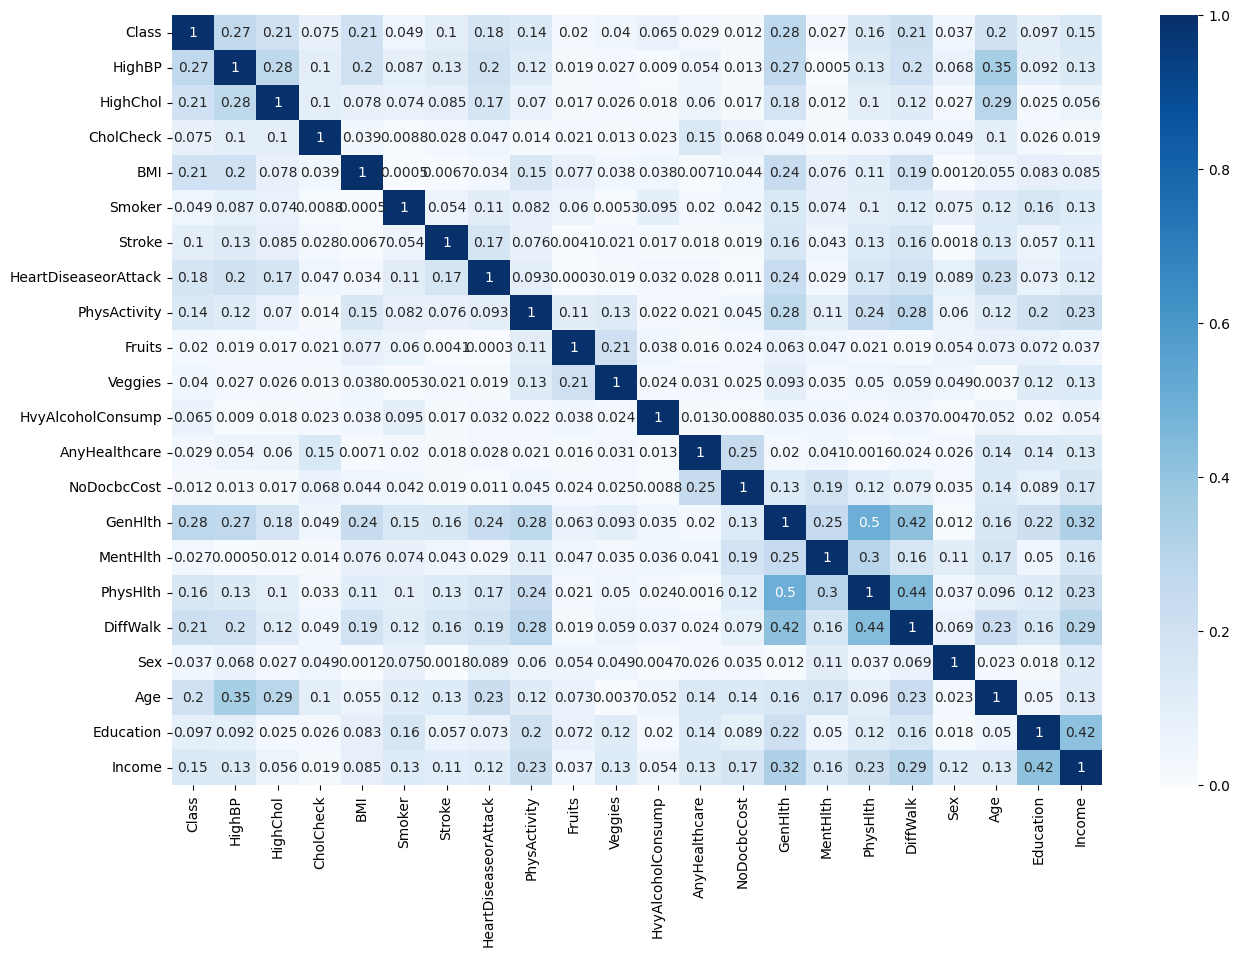

In [20]:
corr = np.abs(df.corr())
corr = np.round(corr, 4)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 2. Encoding Categories Data




## 2.1 Transform data

### 2.1.1 Data transform

In [21]:
# df['HighBPAndChol'] = np.round((df['HighBP'] * 4 + df['HighChol'] * 4 + df['CholCheck'])/9,2)
# df.drop(['HighBP', 'HighChol', 'CholCheck'], axis=1, inplace=True)
df['HighBPAndChol'] = df['HighBP'] * df['HighChol'] *2 + df['CholCheck']
df.drop(['HighBP', 'HighChol', 'CholCheck'], axis=1, inplace=True)
df['HighBMI'] = df['BMI'].apply(
    lambda x: 0 if x < 18.5 else 1 if x < 25 else 2 if x < 30 else 3 if x < 35 else 4 if x < 40 else 5
)
df.drop('BMI', axis=1, inplace=True)
# df['StrokeAndHeartDisease'] = df['Stroke'] + df['HeartDiseaseorAttack']
# df.drop(['Stroke', 'HeartDiseaseorAttack'], axis=1, inplace=True)
# df['HlthCare'] = df['AnyHealthcare'] * df['NoDocbcCost']
# df.drop(['AnyHealthcare', 'NoDocbcCost'], axis=1, inplace=True)
df['GenHlth'] = df['GenHlth'].apply(
    lambda x: int(5-x)
)
df['MentHlth'] = df['MentHlth'].apply(
    lambda x: 0 if x <= 3 else 1 if x <= 10 else 2 if x <= 20 else 3
)
df['PhysHlth'] = df['PhysHlth'].apply(
    lambda x: 0 if x <= 3 else 1 if x <= 10 else 2 if x <= 20 else 3
)
df['Age'] = df['Age'].apply(
    lambda x: 0 if x <= 5 else 1 if x <= 7 else 1.5 if x <= 9 else 2
)
df['Education'] = df['Education'].apply(
    lambda x: 0 if x <= 2 else 1 if x <= 4 else 2
)
df['Income'] = df['Income'].apply(
    lambda x: 0 if x <= 5 else 1 if x <= 7 else 1.5 if x <= 9 else 2
)
df['CharacteristicIndex'] = (df['Age']*3 + df['Education']*4 + df['Income']*3)
df.drop(['Age', 'Education', 'Income'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.Class.value_counts().sort_index()

Class
0    77508
1     4682
2    25134
Name: count, dtype: int64

### 2.1.2 Clean noise

#### High BP & Chol

In [22]:
df.HighBPAndChol.value_counts().sort_index()

HighBPAndChol
0     5571
1    65386
2      438
3    35929
Name: count, dtype: int64

In [23]:
class0 = df[df['Class'] == 0].copy()
class1 = df[df['Class'] == 1].copy()
class2 = df[df['Class'] == 2].copy()
class0AndBMI = class0.loc[class0.HighBPAndChol == 3].index
class2AndBMI = class2.loc[class2.HighBPAndChol == 0].index

df = df.drop(class0AndBMI)
df = df.drop(class2AndBMI)

df['Class'].value_counts().sort_index()

Class
0    56807
1     4682
2    25026
Name: count, dtype: int64

#### BMI

In [24]:
df.HighBMI.value_counts().sort_index()

HighBMI
0     1837
1    17146
2    24482
3    20694
4    12022
5    10334
Name: count, dtype: int64

In [25]:
class0 = df[df['Class'] == 0].copy()
class1 = df[df['Class'] == 1].copy()
class2 = df[df['Class'] == 2].copy()
class0_BMI = class0.loc[class0.HighBMI >= 3].index
class2_BMI = class2.loc[class2.HighBMI <= 1].index

df = df.drop(class0_BMI)
df = df.drop(class2_BMI)

df['Class'].value_counts().sort_index()

Class
0    32125
1     4682
2    22120
Name: count, dtype: int64

#### GenHlth

In [26]:
df.GenHlth.value_counts().sort_index()

GenHlth
0     4992
1    13711
2    19968
3    13767
4     6489
Name: count, dtype: int64

In [27]:
class0 = df[df['Class'] == 0].copy()
class1 = df[df['Class'] == 1].copy()
class2 = df[df['Class'] == 2].copy()

class0_Hlth = class0.loc[class0.GenHlth == 4].index
class1_Hlth = class1.loc[class1.GenHlth >= 3].index
class1_Hlth1 = class1.loc[class1.GenHlth == 0].index
class2_Hlth = class2.loc[class2.GenHlth == 0].index

df = df.drop(class0_Hlth)
df = df.drop(class1_Hlth)
df = df.drop(class1_Hlth1)
df = df.drop(class2_Hlth)

df['Class'].value_counts().sort_index()

Class
0    26757
1     2877
2    19257
Name: count, dtype: int64

#### PhysHlth

In [28]:
df.PhysHlth.value_counts().sort_index()

PhysHlth
0    29125
1     8157
2     4565
3     7044
Name: count, dtype: int64

In [29]:
class0 = df[df['Class'] == 0].copy()
class1 = df[df['Class'] == 1].copy()
class2 = df[df['Class'] == 2].copy()

class0_Hlth = class0.loc[class0.PhysHlth >= 2].index
class1_Hlth = class1.loc[class1.PhysHlth == 3].index
class2_Hlth = class2.loc[class2.PhysHlth == 0].index

df = df.drop(class0_Hlth)
df = df.drop(class1_Hlth)
df = df.drop(class2_Hlth)

df['Class'].value_counts().sort_index()

Class
0    20114
1     2540
2     7375
Name: count, dtype: int64

### 2.1.3 Other transform

In [30]:
# df['HighBPAndBMI'] = df['HighBPAndChol']*6 + df['HighBMI']*2
# df.drop(['HighBPAndChol', 'HighBMI'], axis=1, inplace=True)
# df.drop(['DiffWalk'], axis=1, inplace=True)


## 2.2 Encoding data

In [31]:
! pip install feature-engine

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------------------- ------------------ 5.2/9.9 MB 26.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 24.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 22.7 MB/s eta 0:00:00


In [32]:
from feature_engine.encoding import DecisionTreeEncoder

In [33]:
categorical_columns = ['Smoker', 'PhysActivity', 'Fruits',
                       'Veggies', 'HvyAlcoholConsump',
                       'Sex', 'AnyHealthcare', 'NoDocbcCost',
                       'Stroke', 'HeartDiseaseorAttack',
                       'DiffWalk', 'GenHlth', 'MentHlth', 'PhysHlth', 'HighBMI'
                       ]
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30029 entries, 4 to 236374
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Class                 30029 non-null  int64   
 1   Smoker                30029 non-null  category
 2   Stroke                30029 non-null  category
 3   HeartDiseaseorAttack  30029 non-null  category
 4   PhysActivity          30029 non-null  category
 5   Fruits                30029 non-null  category
 6   Veggies               30029 non-null  category
 7   HvyAlcoholConsump     30029 non-null  category
 8   AnyHealthcare         30029 non-null  category
 9   NoDocbcCost           30029 non-null  category
 10  GenHlth               30029 non-null  category
 11  MentHlth              30029 non-null  category
 12  PhysHlth              30029 non-null  category
 13  DiffWalk              30029 non-null  category
 14  Sex                   30029 non-null  category
 15  HighBP

In [34]:
model = DecisionTreeEncoder(regression=False, cv=3)
X = df.drop('Class', axis=1)
y = df['Class']
X = model.fit_transform(X, y)
df = pd.concat([y,X], axis=1)
df.drop_duplicates(inplace=True)
df

,Class,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,HighBPAndChol,HighBMI,CharacteristicIndex
4,0,0.077867,0.086008,0.085026,0.081567,0.084096,0.073687,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.087265,0.082985,1,0.029257,17.0
11,2,0.091655,0.086008,0.085026,0.081567,0.084992,0.088438,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.083631,0.085960,3,0.240170,14.0
12,2,0.091655,0.086008,0.085026,0.081567,0.084096,0.088438,0.090083,0.087595,0.088290,0.095662,0.087094,0.058544,0.083631,0.082985,1,0.050406,14.0
13,2,0.077867,0.086008,0.085026,0.081567,0.084992,0.088438,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.083631,0.085960,1,0.240170,13.0
20,0,0.091655,0.086008,0.085026,0.086135,0.084992,0.088438,0.090083,0.087595,0.088290,0.095662,0.087094,0.089331,0.083631,0.082985,1,0.050406,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236330,0,0.077867,0.086008,0.085026,0.081567,0.084992,0.088438,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.087265,0.082985,0,0.029257,17.0
236335,2,0.091655,0.086008,0.085026,0.086135,0.084096,0.088438,0.036215,0.087595,0.061831,0.095662,0.065741,0.058544,0.083631,0.085960,1,0.216812,11.0
236341,0,0.077867,0.086008,0.085026,0.086135,0.084096,0.073687,0.090083,0.053524,0.061831,0.000000,0.087094,0.089331,0.083631,0.085960,0,0.029257,7.0
236353,1,0.091655,0.086008,0.085026,0.086135,0.084096,0.073687,0.090083,0.087595,0.088290,0.095662,0.087094,0.089331,0.083631,0.085960,1,0.216812,7.0


In [35]:
df['Class'].value_counts().sort_index()

Class
0    13866
1     2394
2     6959
Name: count, dtype: int64

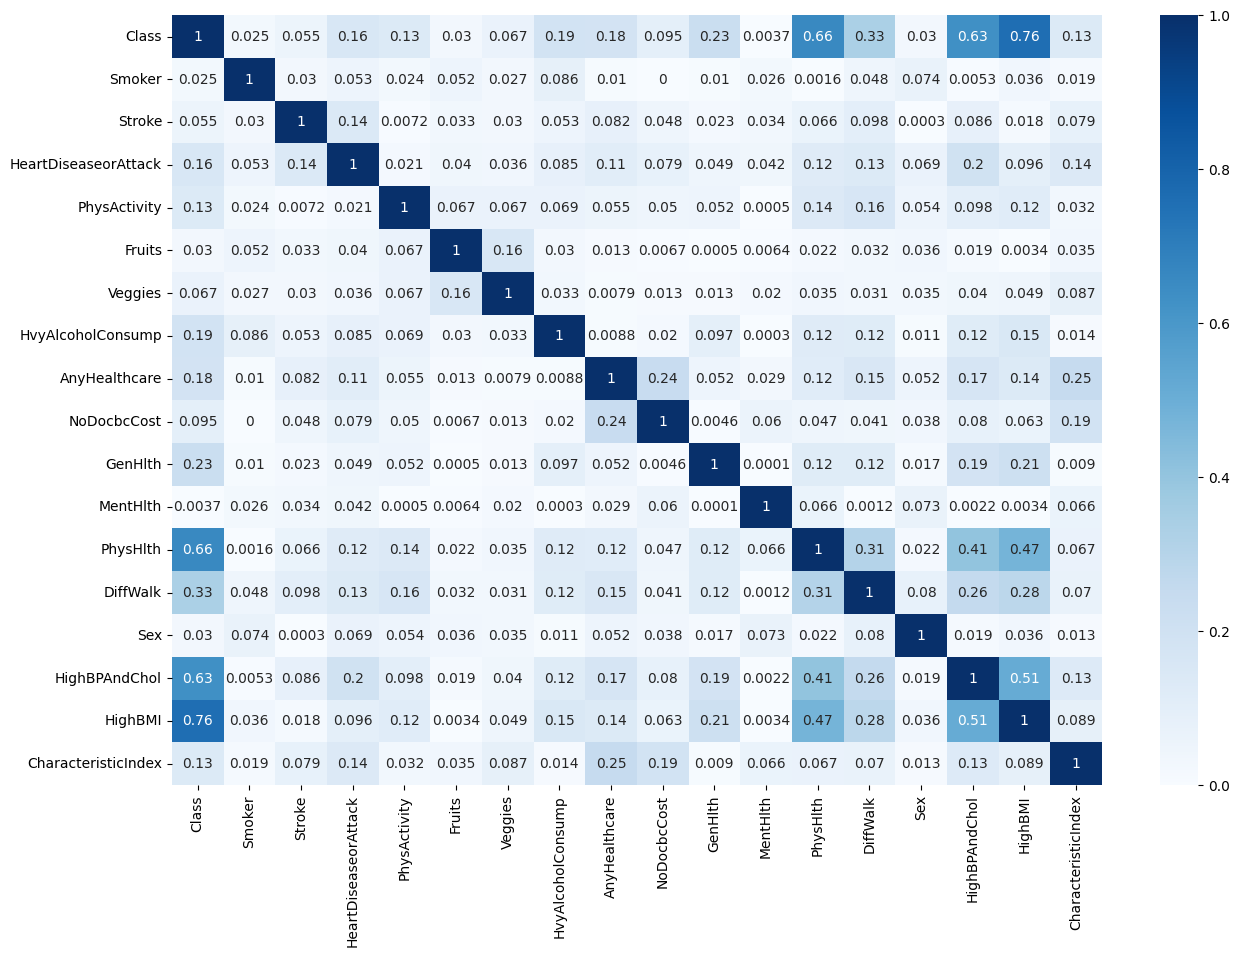

In [36]:
corr = np.abs(df.corr())
corr = np.round(corr, 4)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 4. Save Data

In [40]:
url = glob.glob('../../Data/d6')[0]
url = url+'/diabetes_012_health_indicators_BRFSS2021_cleaned.csv'
df.to_csv(url, index=False)